# Data Loading

In [28]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")

import random
import numpy as np

random.seed(189)
np.random.seed(189)

import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from scipy import io

In [2]:
if __name__ == "__main__":
    for data_name in ["toy", "mnist", "spam"]:
        data = np.load(f"../cs189/data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "training_data", "training_labels", "test_data"
        for field in fields:
            print(field, data[field].shape)


loaded toy data!
training_data (1000, 2)
training_labels (1000,)
test_data (0,)

loaded mnist data!
training_data (60000, 1, 28, 28)
training_labels (60000,)
test_data (10000, 1, 28, 28)

loaded spam data!
training_data (4171, 32)
training_labels (4171,)
test_data (1000, 32)


# 3 Data Partitioning and Evaluation Metrics

In [3]:
mnist = np.load(f"../cs189/data/mnist-data.npz")
mnist_training_data, mnist_training_labels = mnist['training_data'], mnist['training_labels']

spam = np.load(f"../cs189/data/spam-data.npz")
spam_training_data, spam_training_labels = spam['training_data'], spam['training_labels']

### (a) Data partitioning

In [4]:
# Function that shuffles data given a dataset and its labels
def shuffle_data_labels(data, labels):
    data_points = np.arange(data.shape[0])
    np.random.shuffle(data_points)
    return [data[data_points], labels[data_points]]

# Shuffle the datasets
mnist_training_data, mnist_training_labels = shuffle_data_labels(mnist_training_data, mnist_training_labels)
spam_training_data, spam_training_labels = shuffle_data_labels(spam_training_data, spam_training_labels)

# Partition the shuffled datasets
mnist_training_set_data, mnist_training_set_labels = mnist_training_data[10000:, :], mnist_training_labels[10000:]
mnist_validation_set_data, mnist_validation_set_labels = mnist_training_data[:10000, :], mnist_training_labels[:10000]

spam_training_data_len = spam_training_data.shape[0]
spam_training_set_data, spam_training_set_labels = spam_training_data[:int(0.8 * spam_training_data_len), :], spam_training_labels[:int(0.8 * spam_training_data_len)]
spam_validation_set_data, spam_validation_set_labels = spam_training_data[int(0.8 * spam_training_data_len):, :], spam_training_labels[int(0.8 * spam_training_data_len):]

### (b) Evaluation metric

In [5]:
def classification_accuracy(true_labels, pred_labels):
    return np.mean(true_labels == pred_labels)

# 4 Support Vector Machines: Coding

We will use linear Support Vector Machines (SVMs) to classify our datasets. Train a linear SVM on the MNIST and spam datasets that you divided into training and validation sets in the previous problem. For each dataset, plot the classification accuracy (as defined in the previous problem) on the training and validation sets versus the number of training examples that you used to train your classifier. The number of training examples to use are listed for each dataset in the following parts. To evaluate validation accuracy, you should always use the same validation set obtained in the previous problem. To evaluate training accuracy, you should use the portion of the full training set that is actually used to train the model.

You may use sklearn only for the SVM model. Everything else must be done without the use of sklearn. Note: You can use either SVC(kernel=’linear’) or LinearSVC as your SVM model, though they each solve slightly different optimization problems using different libraries.

In [20]:
def train(training_examples, training_set_data, training_set_labels):
    classification_list = []
    for num in training_examples:
        classification = SVC(kernel='linear')
        classification.fit(training_set_data[:num, :], training_set_labels[:num])
        classification_list.append(classification)
        print(f"Training on {num} training examples...")
    print("Training complete!")
    return classification_list

### (a) Train & Evaluate MNIST dataset

In [21]:
# Train model
mnist_training_set_data_flattened = mnist_training_set_data.reshape(mnist_training_set_data.shape[0], -1)
mnist_training_examples = [100, 200, 500, 1000, 2000, 5000, 10000]
mnist_classification_list = train(mnist_training_examples, mnist_training_set_data_flattened, mnist_training_set_labels)

Training on 100 training examples...
Training on 200 training examples...
Training on 500 training examples...
Training on 1000 training examples...
Training on 2000 training examples...
Training on 5000 training examples...
Training on 10000 training examples...
Training complete!


In [22]:
# Evaluate accuracies
mnist_training_accuracy_list = []
mnist_validation_accuracy_list = []
mnist_validation_set_data_flattened = mnist_validation_set_data.reshape(mnist_validation_set_data.shape[0], -1)
for i in range(len(mnist_training_examples)):
    num = mnist_training_examples[i]
    training_predictions = mnist_classification_list[i].predict(mnist_training_set_data_flattened[:num, :])
    validation_predictions = mnist_classification_list[i].predict(mnist_validation_set_data_flattened)
    mnist_training_accuracy_list.append(classification_accuracy(mnist_training_set_labels[:num], training_predictions))
    mnist_validation_accuracy_list.append(classification_accuracy(mnist_validation_set_labels, validation_predictions))

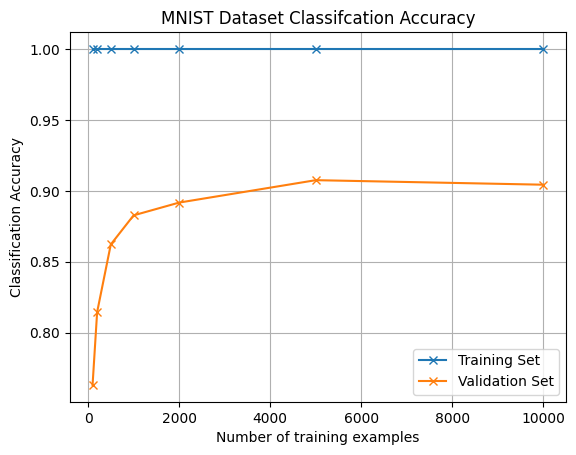

In [23]:
# Plot classification accuracy vs. number of training examples
plt.plot(mnist_training_examples, mnist_training_accuracy_list, label='Training Set', marker="x")
plt.plot(mnist_training_examples, mnist_validation_accuracy_list, label='Validation Set', marker="x")
plt.xlabel('Number of training examples')
plt.ylabel('Classification Accuracy')
plt.grid(True)
plt.title('MNIST Dataset Classifcation Accuracy')
plt.legend()

### (b) Train & Evaluate Spam dataset

In [24]:
# Train model
spam_training_examples = [100, 200, 500, 1000, 2000, spam_training_set_data.shape[0]]
spam_classification_list = train(spam_training_examples, spam_training_set_data, spam_training_set_labels)

Training on 100 training examples...
Training on 200 training examples...
Training on 500 training examples...
Training on 1000 training examples...
Training on 2000 training examples...
Training on 3336 training examples...
Training complete!


In [25]:
# Evaluate accuracies
spam_training_accuracy_list = []
spam_validation_accuracy_list = []
for i in range(len(spam_training_examples)):
    num = spam_training_examples[i]
    training_predictions = spam_classification_list[i].predict(spam_training_set_data[:num, :])
    validation_predictions = spam_classification_list[i].predict(spam_validation_set_data)
    spam_training_accuracy_list.append(classification_accuracy(spam_training_set_labels[:num], training_predictions))
    spam_validation_accuracy_list.append(classification_accuracy(spam_validation_set_labels, validation_predictions))

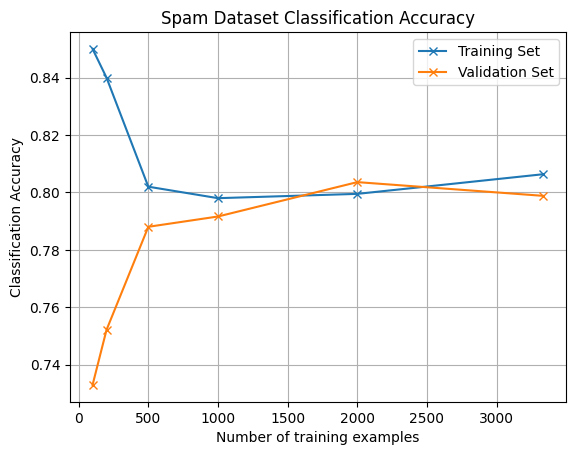

In [26]:
# Plot classification accuracy vs. number of training examples
plt.plot(spam_training_examples, spam_training_accuracy_list, label='Training Set', marker="x")
plt.plot(spam_training_examples, spam_validation_accuracy_list, label='Validation Set', marker="x")
plt.xlabel('Number of training examples')
plt.ylabel('Classification Accuracy')
plt.grid(True)
plt.title('Spam Dataset Classification Accuracy')
plt.legend()

# 5 Hyperparameter Tuning

In [54]:
C_list = [0.000000001, 0.000000005, 0.00000001, 0.00000005, 0.0000001, 0.0000005, 0.000001, 0.000005]
mnist_classification_c_list = []
mnist_training_set_data_flattened = mnist_training_set_data.reshape(mnist_training_set_data.shape[0], -1)

for C in C_list:
    model = SVC(kernel='linear', C=C, max_iter=1000000)
    model.fit(mnist_training_set_data_flattened[:10000, :], mnist_training_set_labels[:10000])
    mnist_classification_c_list.append(model)

In [57]:
best_c = 0
best_val_acc = 0
mnist_classification_val_acc_list = []
mnist_classification_training_acc_list = []
mnist_validation_set_data_flattened = mnist_validation_set_data.reshape(mnist_validation_set_data.shape[0], -1)
for i, C in enumerate(C_list):
    training_predictions = mnist_classification_c_list[i].predict(mnist_training_set_data_flattened[:10000, :])
    training_acc = classification_accuracy(mnist_training_set_labels[:10000], training_predictions)
    mnist_classification_training_acc_list.append(training_acc)
    
    val_predictions = mnist_classification_c_list[i].predict(mnist_validation_set_data_flattened)
    val_acc = classification_accuracy(mnist_validation_set_labels, val_predictions)
    mnist_classification_val_acc_list.append(val_acc)
    
    if val_acc >= best_val_acc:
        best_val_acc = val_acc
        best_c = C
    
    print(f"{C_list[i]}'s training accuracy is {training_acc}, and its validation accuracy is {val_acc}.")

print(f"The best C is {best_c} with validation accuracy {best_val_acc}.")

1e-09's training accuracy is 0.655, and its validation accuracy is 0.6496, 
5e-09's training accuracy is 0.8712, and its validation accuracy is 0.8611, 
1e-08's training accuracy is 0.8948, and its validation accuracy is 0.8816, 
5e-08's training accuracy is 0.9275, and its validation accuracy is 0.9082, 
1e-07's training accuracy is 0.9363, and its validation accuracy is 0.9154, 
5e-07's training accuracy is 0.9549, and its validation accuracy is 0.926, 
1e-06's training accuracy is 0.9646, and its validation accuracy is 0.9256, 
5e-06's training accuracy is 0.9857, and its validation accuracy is 0.9191, 
The best C is 5e-07 with validation accuracy 0.926.


# 6 K-Fold Cross Validation 

In [59]:
def indices_of_ith_partition(size, i, k):
    indices = []
    partition_size = size / k
    index = partition_size * i
    
    while index < min(size, index + partition_size):
        indices.append(int(index))
        index += 1
    
    return np.array(indices)

In [62]:
k = 5
best_c = 0
best_cross_val_acc = 0
spam_classification_cross_val_list = []
spam_classification_cross_training_list = []
for C in C_list:
    sum_training_acc = 0
    sum_val_acc = 0
    for i in range(k):
        model = SVC(kernel='linear', C=C, max_iter=1000000)
        
        spam_training_set_data_partition = spam_training_set_data[indices_of_ith_partition(spam_training_set_data.shape[0], i, k)]
        spam_training_set_labels_partition = spam_training_set_labels[indices_of_ith_partition(spam_training_set_labels.shape[0], i, k)]
        
        model.fit(spam_training_set_data_partition, spam_training_set_labels_partition)
        
        # Maybe put it outside k-for loop
        training_pred = model.predict(spam_training_set_data)
        sum_training_acc += classification_accuracy(spam_training_set_labels, training_pred)
        
        val_pred = model.predict(spam_validation_set_data)    
        sum_val_acc += classification_accuracy(spam_validation_set_labels, val_pred)
    
    avg_training_acc = sum_training_acc / float(k)
    spam_classification_cross_training_list.append(avg_training_acc)
    
    avg_val_acc = sum_val_acc / float(k)
    spam_classification_cross_val_list.append(avg_val_acc)
    
    if avg_val_acc >= best_cross_val_acc:
        best_cross_val_acc = avg_val_acc
        best_c = C
    
    print(f"{C_list[i]}'s training accuracy is {training_acc}, and its cross-validation accuracy is {val_acc}.")

print(f"The best C is {best_c} with cross-validation accuracy {best_val_acc}.")

1e-07's training accuracy is 0.9857, and its cross-validation accuracy is 0.9191.
1e-07's training accuracy is 0.9857, and its cross-validation accuracy is 0.9191.
1e-07's training accuracy is 0.9857, and its cross-validation accuracy is 0.9191.
1e-07's training accuracy is 0.9857, and its cross-validation accuracy is 0.9191.
1e-07's training accuracy is 0.9857, and its cross-validation accuracy is 0.9191.
1e-07's training accuracy is 0.9857, and its cross-validation accuracy is 0.9191.
1e-07's training accuracy is 0.9857, and its cross-validation accuracy is 0.9191.
1e-07's training accuracy is 0.9857, and its cross-validation accuracy is 0.9191.
The best C is 5e-06 with cross-validation accuracy 0.926.
